In [38]:
# The main aim of the model is to predict the career growths and upcoming economic crisises. So data is maintained much precisely.
import numpy as np
import pandas as pd

df=pd.read_csv("adult.data")
print(df.dtypes)
print(df.info())
print(df.describe())

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male        

In [40]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]
df = pd.read_csv("adult.data", names=column_names, header=None) # because the data currently has no columns bcs its a .data file instead of a .csv file.

print(df.dtypes)
print(df.info())
print(df.describe())

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex          

In [ ]:
# Removing null rows to reduce load on computing
df.dropna(subset=["income"], inplace = True)
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# To remove possibilities of lotteries, heriditary wealth, etc.
Q1 = df["capital_gain"].quantile(0.25)
Q3 = df["capital_gain"].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df = df[df["capital_gain"] <= u_limit]
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  28330.000000  2.833000e+04   28330.000000       28330.0       28330.0   
mean      37.894317  1.901707e+05       9.938722           0.0           0.0   
std       13.588255  1.061599e+05       2.527044           0.0           0.0   
min       17.000000  1.228500e+04       1.000000           0.0           0.0   
25%       27.000000  1.177790e+05       9.000000           0.0           0.0   
50%       36.000000  1.788545e+05      10.000000           0.0           0.0   
75%       47.000000  2.376405e+05      12.000000           0.0           0.0   
max       90.000000  1.484705e+06      16.000000           0.0           0.0   

       hours_per_week  
count    28330.000000  
mean        39.992340  
std         12.304598  
min          1.000000  
25%         39.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [30]:
# To remove possibilities of wealth loss due to disaster, accidents, personal health issues, etc.
Q1 = df["capital_loss"].quantile(0.25)
Q3 = df["capital_loss"].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df = df[df["capital_loss"] <= u_limit]
print(df.describe())

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  28330.000000  2.833000e+04   28330.000000       28330.0       28330.0   
mean      37.894317  1.901707e+05       9.938722           0.0           0.0   
std       13.588255  1.061599e+05       2.527044           0.0           0.0   
min       17.000000  1.228500e+04       1.000000           0.0           0.0   
25%       27.000000  1.177790e+05       9.000000           0.0           0.0   
50%       36.000000  1.788545e+05      10.000000           0.0           0.0   
75%       47.000000  2.376405e+05      12.000000           0.0           0.0   
max       90.000000  1.484705e+06      16.000000           0.0           0.0   

       hours_per_week  
count    28330.000000  
mean        39.992340  
std         12.304598  
min          1.000000  
25%         39.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [ ]:
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Calculating skewness
skewness = numerical_cols.skew()
print(skewness)

# Identifying highly skewed columns (threshold: absolute skewness > 0.75)
skewed_cols = skewness[abs(skewness) > 0.75].index
print(f"Skewed Columns: {list(skewed_cols)}")

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64
Skewed Columns: ['fnlwgt', 'capital_gain', 'capital_loss']


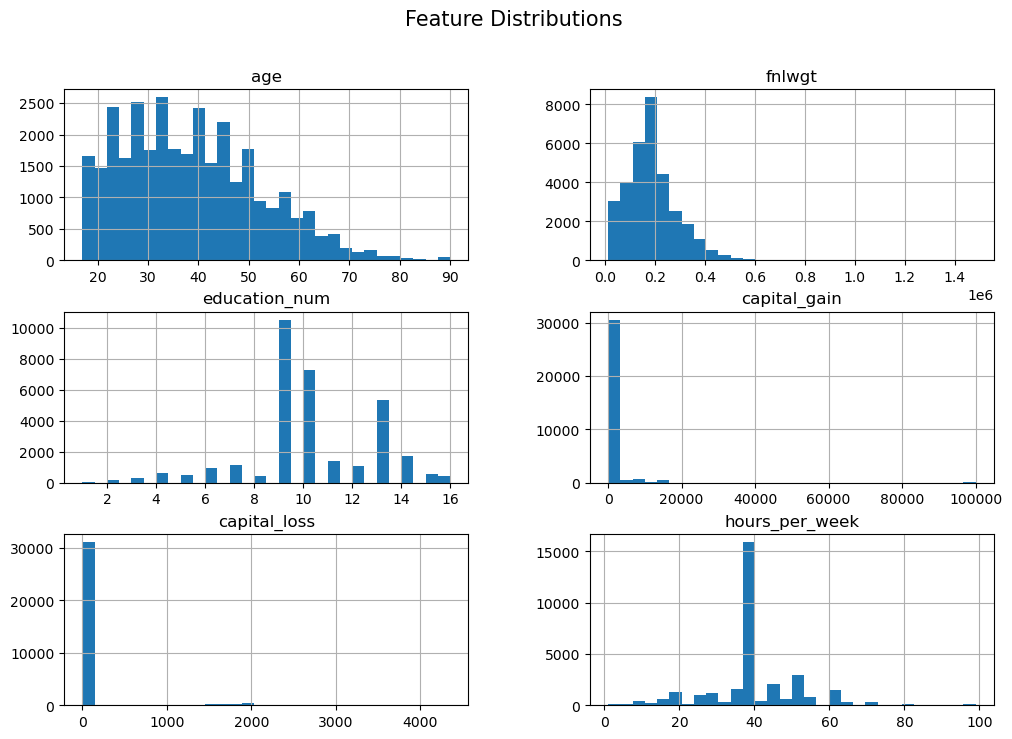

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

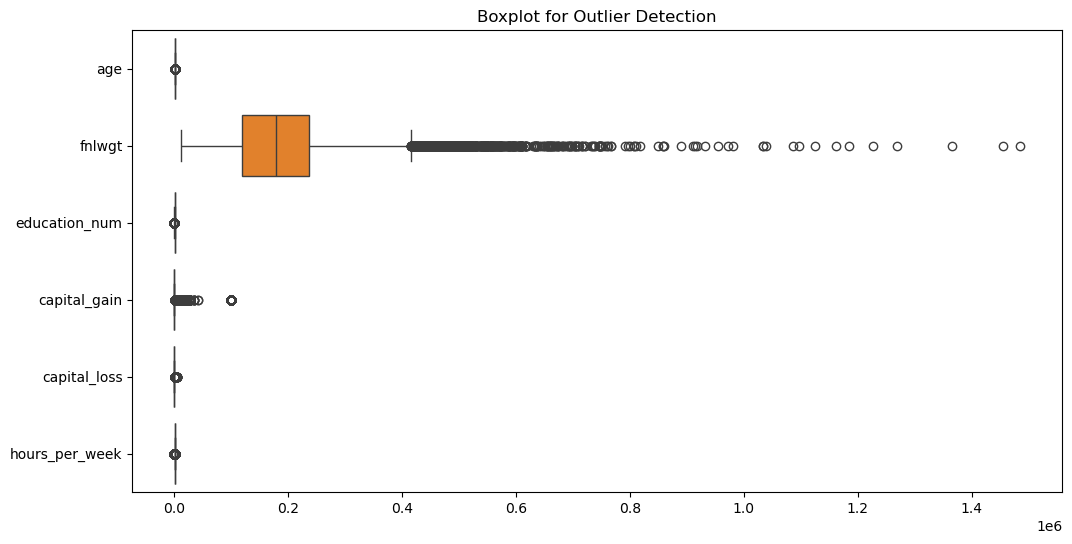

In [46]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot for Outlier Detection")
plt.show()

/tmp/ipykernel_17912/4231125557.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["hours_per_week"], shade=True)


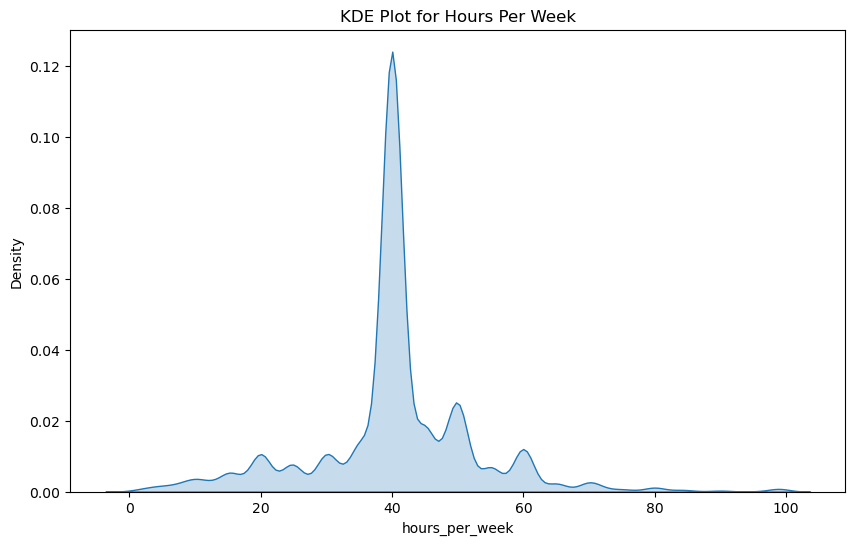

In [48]:
# Kernel density estimation (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(df["hours_per_week"], shade=True)
plt.title("KDE Plot for Hours Per Week")
plt.show()

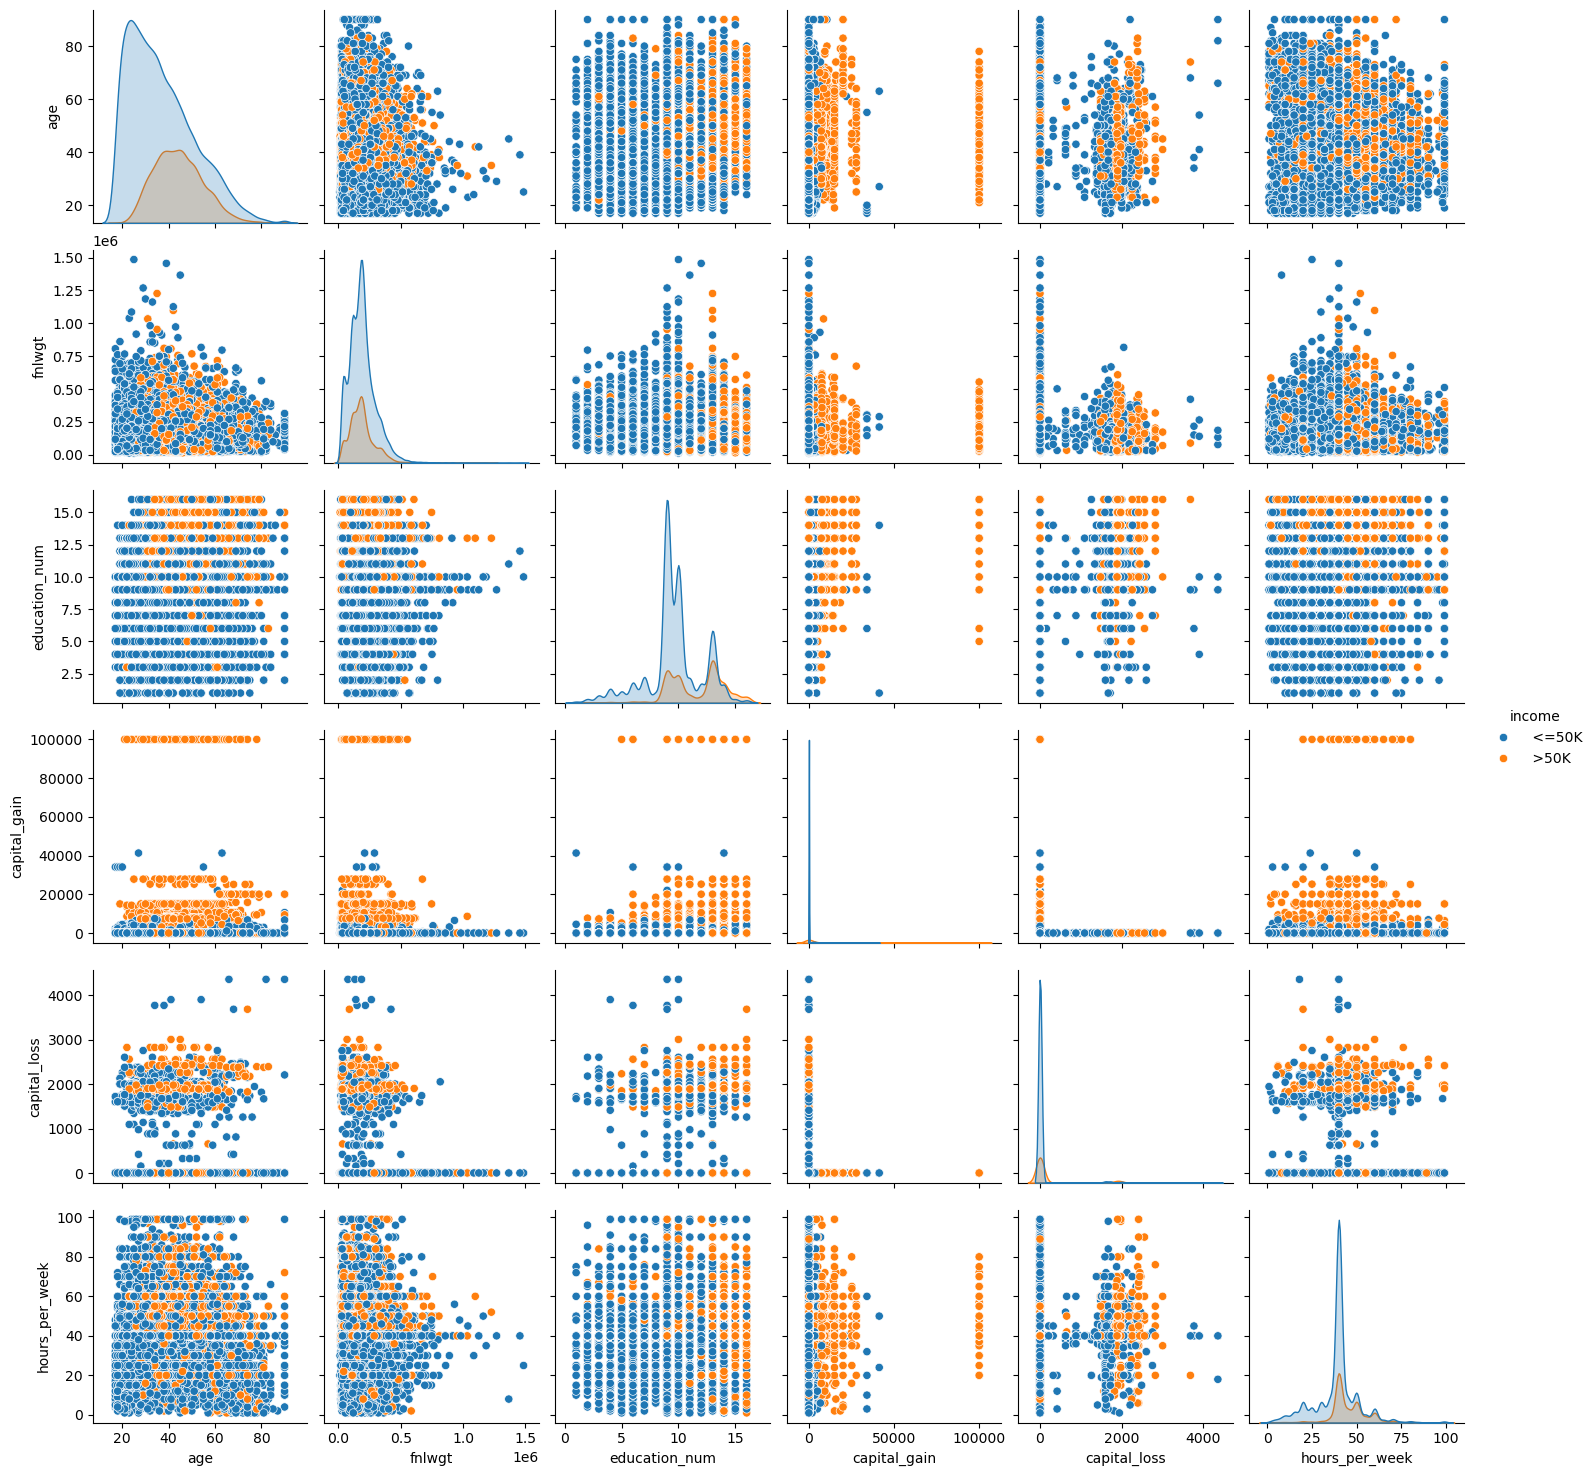

In [49]:
sns.pairplot(df, hue="income", diag_kind="kde")
plt.show()

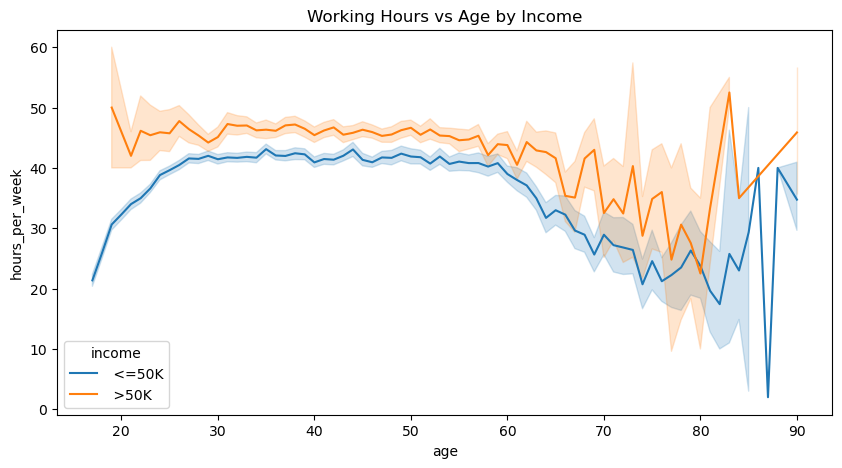

In [52]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="age", y="hours_per_week", hue="income")
plt.title("Working Hours vs Age by Income")
plt.show()

In [53]:
# Checking unique values for each column
print(df.nunique())

# Separating categorical & numerical features
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)


age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income                2
dtype: int64
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["income"] = le.fit_transform(df["income"])
print(df.head())
print(df.dtypes)

   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_ Federal-gov  workclass_ Local-gov  \
0       0                   False                 False   
1       0                   False                 False   
2       0                   False                 False   
3       0                   False                 False   
4       0                   False                 False   

   workclass_ Never-worked  ...  native_country_ Portugal  \
0                    False  ...                     False   
1                    False  ...                     False   

In [61]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Separating features and target
X = df.drop(columns=["income"])  # Droping target variable, here income.
y = df["income"]

# Training a Random Forest model.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
feature_importance = rf.feature_importances_

# Sort features by importance
important_features = np.argsort(feature_importance)[::-1]
for i in important_features:
    print(f"{X.columns[i]}: {feature_importance[i]:.4f}")

fnlwgt: 0.1651
age: 0.1512
capital_gain: 0.1026
hours_per_week: 0.0829
marital_status_ Married-civ-spouse: 0.0751
education_num: 0.0628
marital_status_ Never-married: 0.0363
capital_loss: 0.0312
sex_ Male: 0.0204
occupation_ Exec-managerial: 0.0190
relationship_ Not-in-family: 0.0166
occupation_ Prof-specialty: 0.0141
relationship_ Own-child: 0.0132
education_ Bachelors: 0.0129
workclass_ Private: 0.0111
relationship_ Wife: 0.0100
workclass_ Self-emp-not-inc: 0.0085
education_ Masters: 0.0082
relationship_ Unmarried: 0.0079
education_ HS-grad: 0.0070
occupation_ Sales: 0.0070
native_country_ United-States: 0.0068
occupation_ Other-service: 0.0068
occupation_ Craft-repair: 0.0067
race_ White: 0.0064
workclass_ Self-emp-inc: 0.0063
education_ Prof-school: 0.0059
workclass_ Local-gov: 0.0058
occupation_ Adm-clerical: 0.0055
education_ Some-college: 0.0052
workclass_ Federal-gov: 0.0051
occupation_ Tech-support: 0.0047
workclass_ State-gov: 0.0047
race_ Black: 0.0047
occupation_ Transport-

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif

# Applying SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)

# Get selected feature names.
selected_feature_names = X.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['age', 'education_num', 'capital_gain', 'hours_per_week',
       'marital_status_ Married-civ-spouse', 'marital_status_ Never-married',
       'occupation_ Exec-managerial', 'relationship_ Not-in-family',
       'relationship_ Own-child', 'sex_ Male'],
      dtype='object')


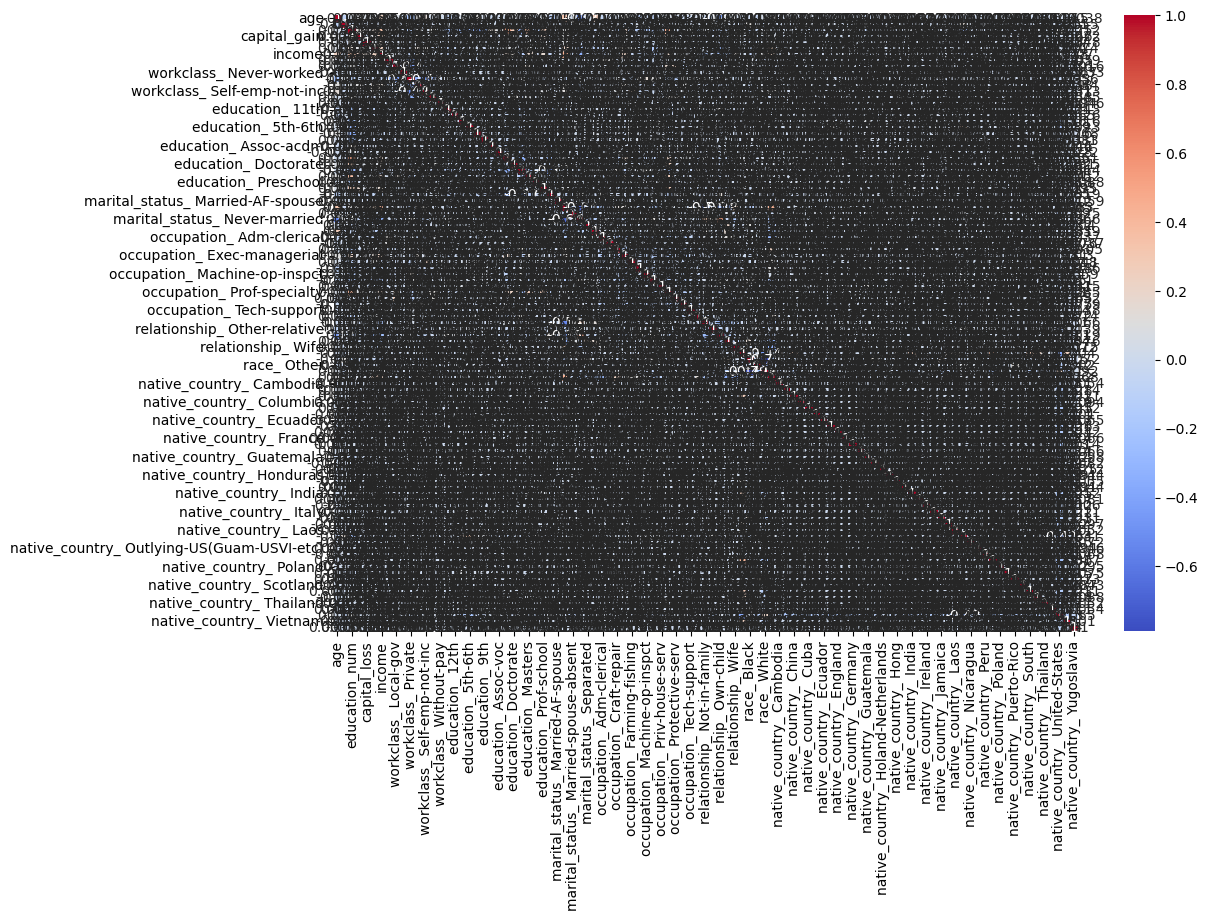

In [63]:
# Check correlation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [64]:
df.drop(columns=["fnlwgt"], inplace=True)  # Example: Drop irrelevant feature.

In [65]:
print(df.head())  # Ensure dataset is clean
print("Final feature set:", df.columns.tolist())

   age  education_num  capital_gain  capital_loss  hours_per_week  income  \
0   39             13          2174             0              40       0   
1   50             13             0             0              13       0   
2   38              9             0             0              40       0   
3   53              7             0             0              40       0   
4   28             13             0             0              40       0   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                   False                 False                    False   
1                   False                 False                    False   
2                   False                 False                    False   
3                   False                 False                    False   
4                   False                 False                    False   

   workclass_ Private  ...  native_country_ Portugal  \
0               False  .

In [66]:
from sklearn.model_selection import train_test_split

# Defining features. { (X) and target (y) }
X = df.drop(columns=["income"])  # Droping target variable
y = df["income"]  # Target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (26048, 99), (26048,)
Testing set: (6513, 99), (6513,)


In [72]:
# Standardization (Z-Score Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Min-Max Scaling (Normalization)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)